In [1]:
using Pkg
Pkg.status()
VERSION

Status `~/.julia/environments/v1.9/Project.toml`
⌅ [7d9fca2a] Arpack v0.5.3
  [6e4b80f9] BenchmarkTools v1.5.0
  [861a8166] Combinatorics v1.0.2
⌃ [a93c6f00] DataFrames v1.6.1
  [864edb3b] DataStructures v0.18.20
  [b7d42ee7] Einsum v0.4.1
  [7a1cc6ca] FFTW v1.8.0
  [d853e229] GroupSlices v0.0.3
  [34004b35] HypergeometricFunctions v0.3.24
  [7073ff75] IJulia v1.25.0
  [a98d9a8b] Interpolations v0.15.1
⌃ [b964fa9f] LaTeXStrings v1.3.1
⌃ [0db19996] NBInclude v2.3.1
⌃ [e7bfaba1] NumericalIntegration v0.2.0
  [6fe1bfb0] OffsetArrays v1.14.1
⌃ [91a5bcdd] Plots v1.40.5
  [49802e3a] ProgressBars v1.5.1
⌃ [92933f4c] ProgressMeter v1.10.0
  [d330b81b] PyPlot v2.11.5
⌅ [6e0679c1] QuantumOptics v1.0.9
⌃ [295af30f] Revise v3.5.15
  [2913bbd2] StatsBase v0.34.3
⌅ [0c5d862f] Symbolics v5.11.0
  [afbbf031] TypedPolynomials v0.4.1
  [9e88b42a] Serialization
  [2f01184e] SparseArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constra

v"1.9.3"

In [78]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using OffsetArrays
using LaTeXStrings
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("../Scripts/Impurity.jl")
includet("../Scripts/Torus_Distance.jl")
includet("Hofstadter_SP.jl")

In [3]:
Nx = 6
Ny = 6
p = 1
q = 6
pn = 2
U = 1

N = Nx*Ny
N_Site = N
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

V = 1
Vrand = 1e-3

0.001

In [4]:
matrix = Hofstadter_SP(Nx, Ny, p / q, 0);

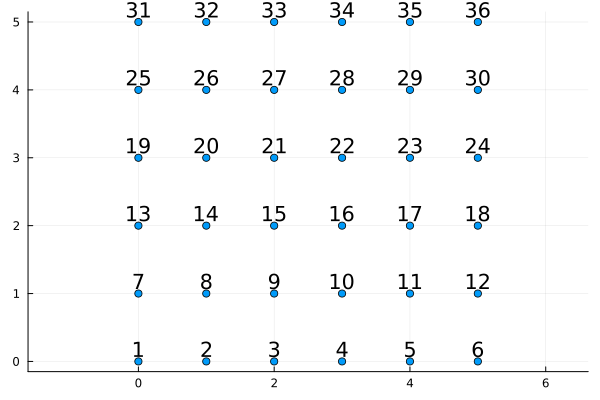

In [5]:
co, lat_plot = plot_square_lattice(N_Site, Nx, Ny)
lat_plot

In [33]:
NPin = 1
V0 = [V]; Imp_Site = [14]
Impurity_Data = Impurity(V0, Imp_Site);

In [82]:
Degeneracy, nu_eff = ground_degeneracy(Nx, Ny, p, q, NPin, pn)
ParameterInfo(NPin, pn, Nx, Ny, p, q);


 Lattice Size: 6x6
 The Number of Flux per Unit-Cell (ϕ) = 1//6
 Filling Fraction (ν) = 1//3 (The Number of Quasiholes = 2)
 The Number of Flux Quanta = 5 (Delocalised Number = 1)
The Total Number of Particle = 2
 The Effective Filling = 2//5
The Number of Ground State Degeneracy = 5


In [35]:
HardCore = false
HHubbard, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb)

Impurity_H = Imp_H(Sub_Number_MB_Operator_List, Impurity_Data, Vrand)

Total_H = HHubbard + Impurity_H;

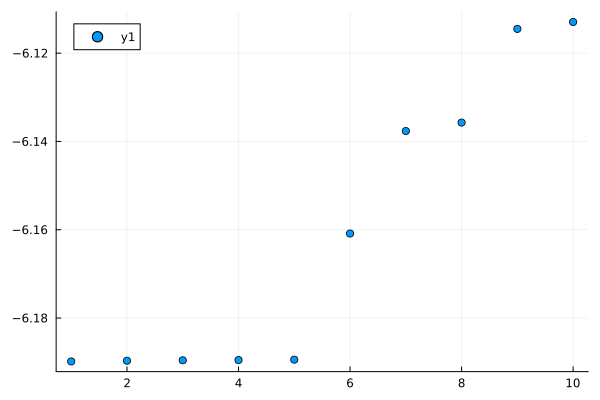

In [36]:
ϵ, psi = eigenstates(dense(Total_H))
scatter(ϵ[1:10])

In [37]:
avg_density = Get_Avg_Density(Nx, Ny, Degeneracy, N_Site, Sub_Number_MB_Operator_List, basis_cut_mb, psi);

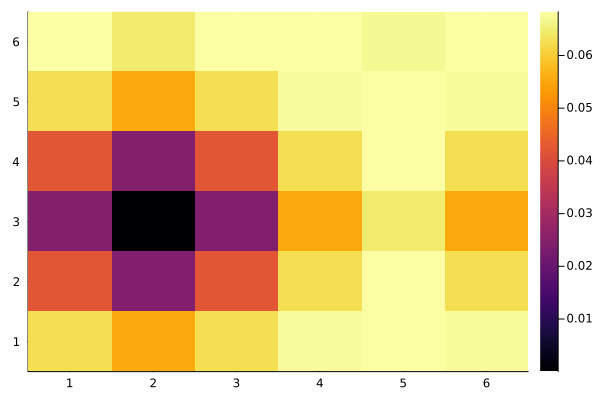

In [38]:
heatmap(avg_density')

In [ ]:
# REFERENCE PARTICLE DENSITY (PARTICLE DENSITY WITHOUT NO PIN)
ref_par_density = (pn*(p/q))/(NPhi0-NPin)

0.06666666666666667

In [44]:
coords = get_coords_square(Nx, Ny)
Radius = 2; ref_site = 13
Inner_Sites(Radius,ref_site,coords)

13-element Vector{Any}:
  1
  7
  8
 12
 13
 14
 15
 17
 18
 19
 20
 24
 25

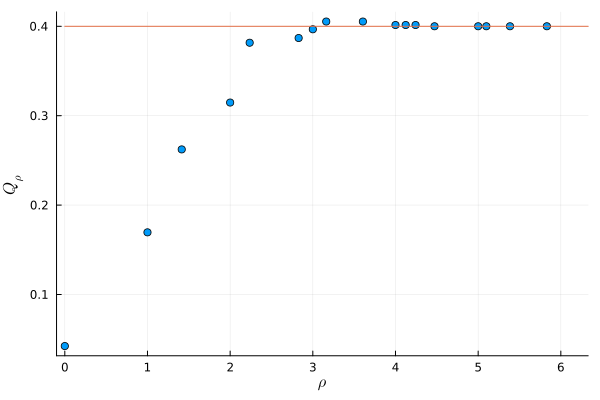

In [99]:
radius_list = get_radii(coords, ref_site, N)
charge_dep = charge_depletion_prof(radius_list,ref_site,coords,ref_par_density,avg_density)
scatter(radius_list, charge_dep)
x=0;g(x)=nu_eff
plot!(g, x, length(radius_list), xlabel=L"\rho", ylabel=L"Q_{\rho}", xlim=(-0.1,maximum(radius_list)+0.5), legend=false) 